In [1]:
import numpy as np
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
orig_img = Image.open("./kani.jpg").convert('L')
x = np.array(np.array(orig_img))

In [3]:
x.shape

(400, 400)

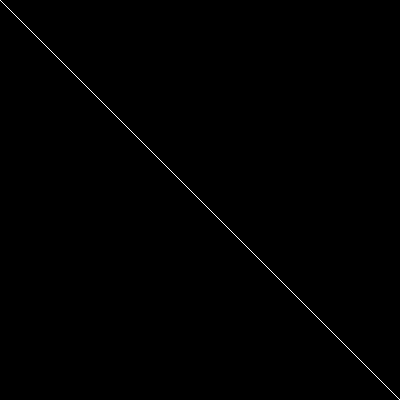

In [4]:
ones_arr = np.ones(x.shape[0])
matrix_A = np.diag(ones_arr)
Image.fromarray(np.uint8(matrix_A*255))

In [5]:
for i in range(0,matrix_A.shape[0]):
    matrix_A[i,i] = 0.21
    if(i>2 and i < matrix_A.shape[0]-3):
        matrix_A[i+1,i] = 0.13
        matrix_A[i+2,i] = 0.08
        matrix_A[i+3,i] = 0.02
        
        matrix_A[i-1,i] = 0.13
        matrix_A[i-2,i] = 0.08
        matrix_A[i-3,i] = 0.02
    if(i==0):
        matrix_A[i+1,i] = 0.13
        matrix_A[i+2,i] = 0.08
        matrix_A[i+3,i] = 0.02
    if(i==1):     
        matrix_A[i+1,i] = 0.13
        matrix_A[i+2,i] = 0.08
        matrix_A[i+3,i] = 0.02
        
        matrix_A[i-1,i] = 0.13
        
    if(i==2):     
        matrix_A[i+1,i] = 0.13
        matrix_A[i+2,i] = 0.08
        matrix_A[i+3,i] = 0.02
        
        matrix_A[i-1,i] = 0.13
        matrix_A[i-2,i] = 0.08
        
    if(i==matrix_A.shape[0]-2):     
        matrix_A[i+1,i] = 0.13
        matrix_A[i-1,i] = 0.13
        matrix_A[i-2,i] = 0.08
        matrix_A[i-3,i] = 0.02
        
    if(i==matrix_A.shape[0]-1):     
        matrix_A[i-1,i] = 0.13
        matrix_A[i-2,i] = 0.08
        matrix_A[i-3,i] = 0.02

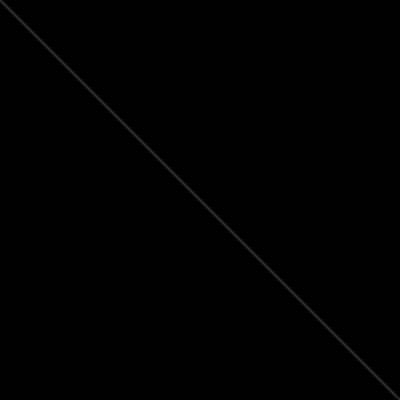

In [6]:
Image.fromarray(np.uint8(matrix_A*255))

In [7]:
y = matrix_A.dot(x)

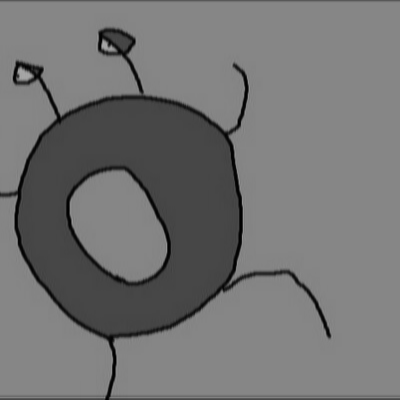

In [8]:
out_pilImg1 = Image.fromarray(np.uint8(y))
out_pilImg1

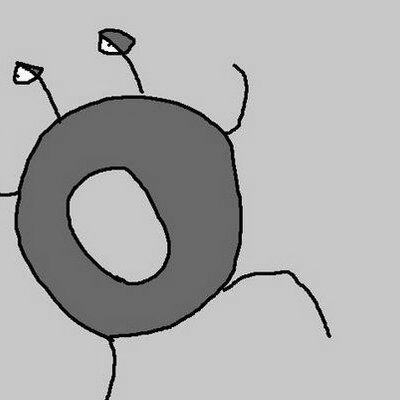

In [9]:
orig_img

In [10]:
inv_A = np.linalg.inv(matrix_A)

In [11]:
inv_A

array([[  8.26453609e+00,  -5.21471180e+00,  -1.31191072e+00, ...,
          0.00000000e+00,  -9.14607094e-68,   2.51688869e-69],
       [ -5.21471180e+00,   1.15548864e+01,  -4.38692955e+00, ...,
          0.00000000e+00,   7.11838389e-67,  -2.82447620e-67],
       [ -1.31191072e+00,  -4.38692955e+00,   1.17631389e+01, ...,
          0.00000000e+00,  -5.85190069e-67,   3.37112418e-67],
       ..., 
       [  2.12267673e-67,   1.65726584e-68,  -6.79647537e-67, ...,
          4.76190476e+00,  -1.77589850e+00,  -5.31082220e-01],
       [ -9.14607094e-68,   7.11838389e-67,  -5.85190069e-67, ...,
          0.00000000e+00,   9.91883070e+00,  -5.70397406e+00],
       [  2.51688869e-69,  -2.82447620e-67,   3.37112418e-67, ...,
          0.00000000e+00,  -5.70397406e+00,   8.11822227e+00]])

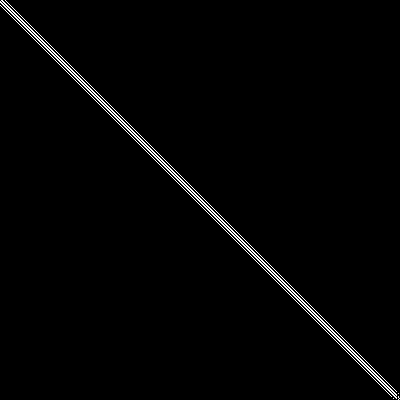

In [12]:
Image.fromarray(np.uint8(inv_A))

In [13]:
recon_pilImg = Image.fromarray(np.uint8(inv_A.dot(y)))

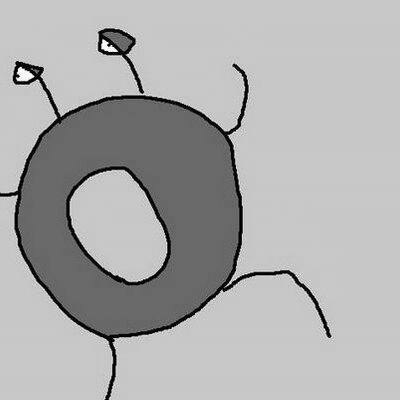

In [14]:
recon_pilImg

In [24]:
noise_arr = np.zeros(y.shape)
for i in range(0,noise_arr.shape[0]):
    randn = int((noise_arr.shape[0]) * np.random.rand())
    print(randn,i)
    noise_arr[randn,i] = np.abs(np.random.randn(1)+0.2)    

213 0
386 1
105 2
153 3
267 4
179 5
314 6
6 7
32 8
47 9
307 10
91 11
367 12
294 13
339 14
20 15
235 16
192 17
47 18
277 19
78 20
150 21
98 22
188 23
55 24
153 25
290 26
220 27
321 28
21 29
26 30
62 31
77 32
244 33
165 34
331 35
190 36
111 37
182 38
171 39
145 40
95 41
104 42
338 43
235 44
185 45
57 46
317 47
355 48
332 49
254 50
312 51
83 52
194 53
103 54
347 55
344 56
225 57
369 58
354 59
218 60
149 61
382 62
239 63
232 64
26 65
70 66
187 67
102 68
239 69
245 70
382 71
170 72
117 73
355 74
224 75
265 76
74 77
205 78
366 79
164 80
288 81
66 82
315 83
387 84
99 85
8 86
80 87
8 88
242 89
263 90
330 91
156 92
168 93
181 94
278 95
385 96
102 97
175 98
122 99
315 100
110 101
179 102
397 103
129 104
281 105
111 106
204 107
115 108
257 109
142 110
94 111
303 112
95 113
10 114
106 115
315 116
369 117
217 118
94 119
128 120
368 121
154 122
140 123
389 124
91 125
197 126
62 127
286 128
219 129
264 130
174 131
20 132
123 133
95 134
187 135
326 136
296 137
283 138
19 139
183 140
306 141
105 142
21

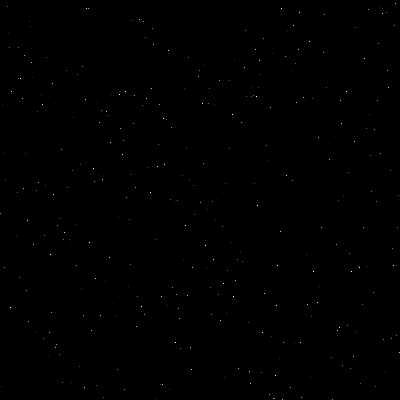

In [25]:
Image.fromarray(np.uint8(noise_arr*255))

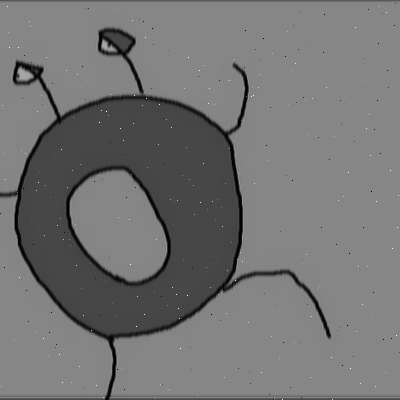

In [26]:
Image.fromarray(np.uint8(y+noise_arr*255))

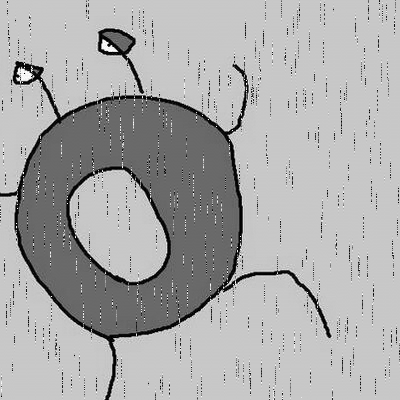

In [27]:
Image.fromarray(np.uint8(inv_A.dot(y+noise_arr*255)))

In [50]:
gamma = 0.05
I = np.diag(np.ones(400))
tmp = np.linalg.inv(matrix_A.T.dot(matrix_A)+gamma*I)
tmp = tmp.dot(matrix_A.T)
recon_x = tmp.dot((y+noise_arr*255))

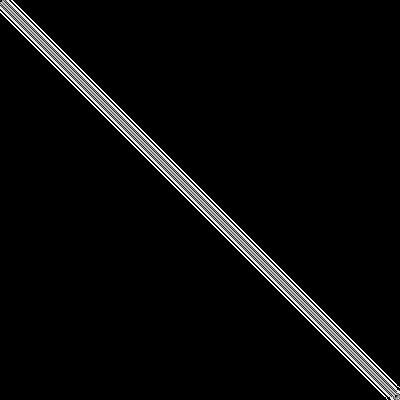

In [51]:
Image.fromarray(np.uint8(np.linalg.inv(matrix_A.T.dot(matrix_A)+gamma*I)*255))

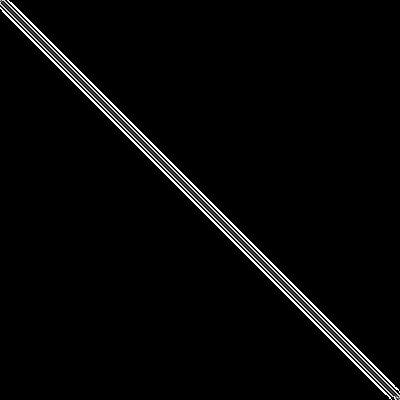

In [52]:
Image.fromarray(np.uint8(tmp*255))

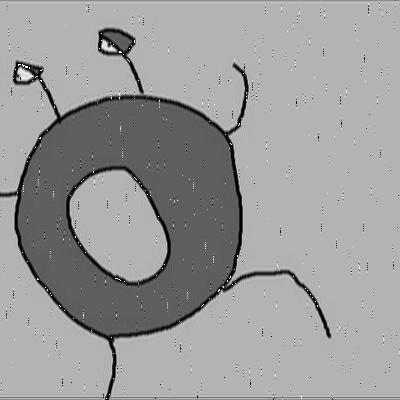

In [53]:
Image.fromarray(np.uint8(recon_x))